# UTSA CS 5233: Assignment-3 - Artificial Intelligence

**Oguibe God'salvation - jlz446** 

## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree. 
The assignment is divided into two sections, each for one unique ML algorithm. 

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


## Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [1]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
import math
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import sklearn
from sklearn.model_selection import train_test_split
import copy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


# Stochastic Gradient Descent
(60 points)


In this section, you will implement the Stochastic Gradient Descent algorithm for a **regression** task.

'house_price_dataset.csv' is the data file that will be provided to you for the gradient descent algorithm implementation.

The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the output value for that instance that your model should predict.




In [4]:
# read the data file
# create a normalized version of the original data which is what will be used by the algorithm
# Data file name variables
trainData = pd.read_csv(basePath + "house_price_dataset.csv")

preproc = preprocessing.normalize(trainData)
norm_df = pd.DataFrame(preproc, columns=trainData.columns)
norm_df.head()



,X2 house age,X3 distance to the nearest station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.201737,0.535100,0.063043,0.157500,0.766225,0.238933
1,0.058362,0.917610,0.026936,0.074764,0.363757,0.126301
2,0.023025,0.972905,0.008656,0.043258,0.210416,0.081886
3,0.022999,0.971790,0.008646,0.043209,0.210175,0.094761
4,0.012132,0.947692,0.012132,0.060611,0.294916,0.104580


In [5]:
trainData.head()

,X2 house age,X3 distance to the nearest station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
trainData.shape

(412, 6)

In [7]:
# Activation Function - implement Sigmoid
# given 'h' compute and return 'z' based on the activation function implemented
def activation_function(h):
    return 1/(1+math.exp(-h))


In [8]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
def train(train_data, weights, learning_rate):
    # if weights are []
    if len(weights) == 0:
        # initialize weights to 0 -- number of weights = number of variables + 1 for bias
        weights = np.zeros(train_data.shape[1])
    # go through each training data instance
    for i in range(len(train_data)):
        # get 'x' as one multi-variate data instance -- remember to append '1' at the end for the bias term
        row = train_data.iloc[i].values.tolist()
        x = row[:5]
        x.append(1)
        # get 'y' as the ground truth value, which is the last value in the given row
        y = row[5]
        # obtain h(x)
        h = np.dot(x, weights)
        # call the activation function with 'h' as parameter to obtain 'z'
        z = activation_function(h)
        # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
        for j in range(len(weights)):
            weights[j] += learning_rate * (y-z) * x[j]
    # return the final learnt weights
    return weights


In [9]:
# Test the model (weights learnt) using the given test dataset
# return the average error value
def test(test_data, weights):
    # go through each testing data instance
    error = 0
    
    for i in range(len(test_data)):
        # get 'x' as one multi-variate data instance -- remember to append '1' at the end for the bias term
        row = test_data.iloc[i].values.tolist()
        x = row[:5]
        x.append(1)
        # get 'y' as the ground truth value, which is the last value in the given row
        y = row[5]
        # obtain h(x)
        h = np.dot(x, weights)
        # call the activation function with 'h' as parameter to obtain 'z'
        z = activation_function(h)
        # compare 'z' with 'y' to calculate the absolute error (not least squared) for each data instance
        error += abs(z-y)
    # return the average error value for the given test dataset
    return error/len(test_data)

**Determine the best learning rate and plot the graph for training error vs learning rate**

In [10]:
train_data, test_data = train_test_split(trainData, train_size = 0.7)

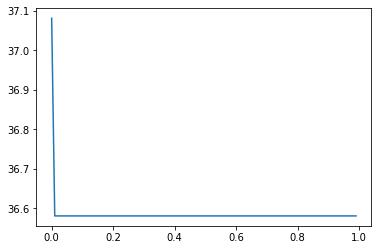

In [11]:
# Go through all possible learning rates from 0 to 1 in increments of 0.01
error = []
learningRate =  [round(i,2) for i in np.arange(0.0, 1.0, 0.01)]
# For each learning rate
for i in learningRate:
    weight = []    
    # Call the above "train" function on the entire dataset to obtain the "weights"
    weightss = train(train_data, weights = weight , learning_rate = i)
    # Use the "weights" and call the "test" function to obtain the "average_error" for training
    average_error = test(test_data, weightss)
    # Save this "error" in a list of errors
    error.append(average_error)

# once the error values are obtained for all the learning rates, find the best learning rate (one with the least error)
# also, plot the graph of learning rate (x-axis) and average error (y-axis)

plt.plot(learningRate, error)



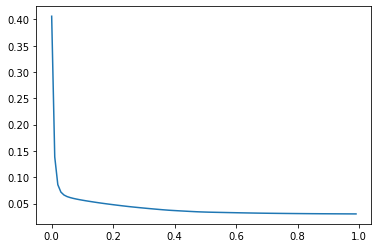

In [12]:
train_data, test_data = train_test_split(norm_df, train_size = 0.7)

# Go through all possible learning rates from 0 to 1 in increments of 0.01
error = []
learningRate =  [round(i,2) for i in np.arange(0.0, 1.0, 0.01)]
# For each learning rate
for i in learningRate:
    weight = []    
    # Call the above "train" function on the entire dataset to obtain the "weights"
    weightss = train(train_data, weights = weight , learning_rate = i)
    # Use the "weights" and call the "test" function to obtain the "average_error" for training
    average_error = test(test_data, weightss)
    # Save this "error" in a list of errors
    error.append(average_error)

# once the error values are obtained for all the learning rates, find the best learning rate (one with the least error)
# also, plot the graph of learning rate (x-axis) and average error (y-axis)

plt.plot(learningRate, error)

**Split the dataset into two parts (train and test). Perform 20 iterations on the dataset to obtain the average errors and see how it changes with each iteration.**

In [13]:
# Split the entire dataset randomly into two different parts --
  # "train_data" - 70% of the entire data
  # "test_data" - remaining 30% of the data
train_data, test_data = train_test_split(norm_df, train_size = 0.7)
# Normalize both of them

# Use the "best_learning_rate" found above
best_learning_rate = 1.0
# Start the weights = []
weights = []
avg_train_error = []
avg_test_error = []
iterations = [i for i in range(0, 20, 1)]
# Perform 20 iterations on the entire dataset and for each iteartion
for _ in range(20):
    # Call the above "train" function on the "train_data" to obtain the updated "weights"
    weights = train(train_data, weights = weights , learning_rate = best_learning_rate)
    # Use the "weights" and call the "test" function to obtain the "average_training_error" for the "train_data"
    average_training_error = test(train_data, weights)
    avg_train_error.append(average_training_error)
    # Use the "weights" and call the "test" function to obtain the "average_testing_error" for the "test_data"
    average_testing_error =  test(test_data, weights)
    avg_test_error.append(average_testing_error)
    # Print both the average errors for the given iteration number
    print('Average train error is: ',average_training_error)
    print('Average test error is: ', average_testing_error)
    
    print("*" * 50)
    print()

Average train error is:  0.03365132301871468
Average test error is:  0.03641176950275053
**************************************************

Average train error is:  0.0317882528890495
Average test error is:  0.03564795960999501
**************************************************

Average train error is:  0.03106424511412796
Average test error is:  0.0352230853507106
**************************************************

Average train error is:  0.030446441850032716
Average test error is:  0.03477990677813688
**************************************************

Average train error is:  0.02987748361128537
Average test error is:  0.03436894541648348
**************************************************

Average train error is:  0.029350940910951362
Average test error is:  0.03401591545484188
**************************************************

Average train error is:  0.028862885666727362
Average test error is:  0.03367430362975475
**************************************************

Average trai

## Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



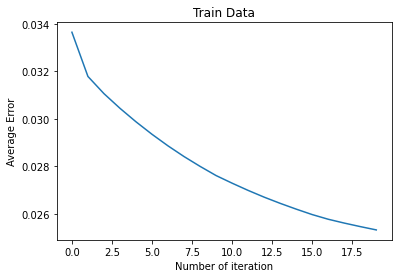

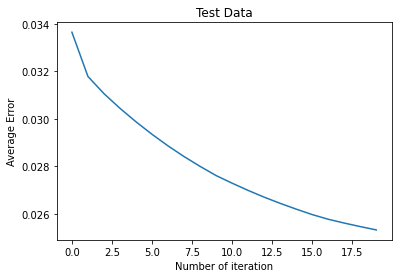

In [14]:
# Save the above calculated error values "average_training_error" and "average_testing_error" in two different lists
# For each of the two average errors, plot a graph for iteration-number (x-axis) and average error (y-axis)
# avg_train_error
# avg_test_error
# iterations

len(avg_train_error), len(avg_test_error), len(iterations)

plt.plot(iterations, avg_train_error, label='Training Error')
plt.xlabel('Number of iteration')
plt.ylabel('Average Error')
plt.title('Train Data')
plt.show()


plt.plot(iterations, avg_train_error, label='Testing Error')
plt.xlabel('Number of iteration')
plt.ylabel('Average Error')
plt.title('Test Data')
plt.show()


# ID3 Decision Tree
(90 points)

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that there are **no missing values** in the train or test data. 

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

*Both these files should be present in the same folder as this code file.* In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1   --   15
            attr3 = 1 : 0   --   7
        attr3 = 1 :
            attr4 = 0 : 0   --   12
            attr4 = 1 : 1   --   6
    attr1 = 1 :
        attr2 = 1 : 1   --   9

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %






In [18]:
train = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/""id3-train.dat"
test = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/""id3-test.dat"

# Read the training and testing data files
train_data = pd.read_csv(train, delim_whitespace=True)
test_data = pd.read_csv(test, delim_whitespace=True)

In [19]:
train_data.head()

,attr1,attr2,attr3,attr4,attr5,attr6,class
0,1,1,0,0,0,0,0
1,0,0,1,1,0,1,0
2,0,1,0,1,1,0,0
3,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0


In [20]:
# Tree Node
class Node:
    def __init__(self, parent=None):
        # which attr we need to split on
        self.attr = None
        # children of this node
        self.children = []
        # corresponding class value of features
        self.label = None
        # value of parent's attribute
        self.splitVal = None
        # the number of instances of the current feature with the split val specified by the parent
        self.count = None
        # the parent node
        self.parent = None

In [21]:
# find total entropy for the data set
def total_entropy(data, data_label, classes):
    num_of_instances = data.shape[0]
    entropy = 0

    for c in classes:
        class_count = data[data[data_label] == c].shape[0]
        class_entropy = - (class_count / num_of_instances) * np.log2(class_count / num_of_instances)
        entropy += class_entropy
    return entropy

In [22]:
# find the entropy for each attribute
def entropyAttribute(data, data_label, classes):
    count = data.shape[0]
    entropy = 0

    for c in classes:
        label_class_count = data[data[data_label] == c].shape[0]
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count / count
            entropy_class = - probability_class * np.log2(probability_class)
        entropy += entropy_class
    return entropy

In [23]:
#  finds the info gain for a specific attribute
def find_info_gain(feature_name, data, data_label, classes):
    features = data[feature_name].unique()
    num_of_instances = data.shape[0]
    feature_info = 0
    # loop through each feature and calculate its info gain
    for feature in features:
        feature_data = data[data[feature_name] == feature]
        num_of_feature_instances = feature_data.shape[0]
        current_entropy = entropyAttribute(feature_data, data_label, classes)
        feature_probability = num_of_feature_instances / num_of_instances
        feature_info += feature_probability * current_entropy
    # return the value returned by find_entropy - feature_info
    return total_entropy(data, data_label, classes) - feature_info

In [24]:
# find max gain by calling and comparing each attributes info gain
def find_max_info_gain(data, label, classes, features):
    max_value = -1
    maxFeature = None
    for feature in features:
        current_feature_gain = find_info_gain(feature, data, label, classes)
        if max_value < current_feature_gain:
            max_value = current_feature_gain
            maxFeature = feature
    return maxFeature

In [25]:
# get the majority feature label
def majority_feature_label(data):
    # get the class labels
    labels = data['class'].unique()
    # initialize the majority label to None
    majority_label = labels[0]
    major_count = 0
    # go through each class label
    for label in labels:
        # get the count of the class label
        count = len(data[data['class'] == label])
        # if the count is greater than the majority label update the majority label
        if count > major_count:
            majority_label = label
            major_count = count
    # return the majority label
    return majority_label


In [26]:
# prediction for root instance in data set
def predict_root_instance(root, data): #more 
    node = None
    if root.label != None:
        return root.label
    split_val = data[root.attr]
    for child in root.children:
        if child.splitVal == split_val:
            node = child
            break
    # if node is empty
    if node is None:
        node = root.children[0]
    return predict_root_instance(node, data)

In [27]:
# finds the accuracy for each data set
def data_accuracy(root, data):
    labels = data['class'].unique()
    correct = 0
    for i, row in data.iterrows():
        label = row['class']
        result = predict_root_instance(root.children[0], row)
        result2 = predict_root_instance(root.children[1], row)
        if label in [result, result2]:
            correct += 1
    accuracy = correct / len(data)
    return accuracy

In [29]:
# prints the decision tree
def print_decision_tree(root, level=0):
    tab = '\t' * level
    if root.attr is None:
        for child in root.children:
            print_tree(child, level + 1)
    elif not root.children:
        print(tab, root.attr, "=", root.splitVal, ":", root.label, "--", root.count)
    else:
        print(tab, root.attr, "=", root.splitVal, ":")
        for child in root.children:
            print_tree(child, level + 1)

In [30]:
# Pseudocode for the ID3 algorithm. Use this to create function(s).
# def ID3(data, root, attributesRemaining):
def ID3(data, root, attributesRemaining):
    # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
    if len(data) == 0:
        # Choose and assign the class that is most frequent in the entire training set and return the updated tree
        root.label = majority_feature_label(data)
    # If all the instances have only one class label
    label = data['class'].unique()
    if len(label) == 1:
        # Make this as the leaf node and use the label as the class value of the node and return the updated tree
        root.label  = label[0]
        return
    # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
    if len(attributesRemaining) == 0:
        # Assign the most frequent class among the instances at the leaf node and return the updated tree
        root.label = majority_feature_label(data)
        return
    # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
    data_label = data.columns[-1]
    classes = label
    max_attribute = find_max_info_gain(data, data_label, classes, attributesRemaining)
    attributesRemaining.remove(max_attribute)
    # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
    maxAttrValues = data[max_attribute].unique().tolist()
    maxAttrValues.sort()
    # return the root as the tree
    
    for value in maxAttrValues:
        subtable = data[data[max_attribute] == value]
        child_node = Node(parent=root)
        child_node.attr = max_attribute
        child_node.splitVal = value
        child_node.count = len(subtable)
        root.children.append(child_node)
        attributes_copy = copy.deepcopy(attributesRemaining)
        ID3(subtable, child_node, attributes_copy)
        # return the root as the tree
    return


In [31]:
# Create the decision tree by implementing the ID3 algorithm. Pseudocode provided above.
# Print the tree in the example format mentioned.

# Use the above created tree to predict the training data and print the accuracy as "Accuracy on the Training data = x %"
    # For each training instance, predict the output label
    
    # Compare it with the ground truth class label and calculate the accuracy accordingly
# Use the above created tree to predict the testing data and print the accuracy as "Accuracy on the Test data = x %"
    # For each testing instance, predict the output label
    # Compare it with the ground truth class label and calculate the accuracy accordingly


train_attributes = list(train_data)[0:-1]
test_attributes = list(test_data)[0:-1]

trainRoot = Node()
ID3(train_data, trainRoot, train_attributes)


testRoot = Node()
ID3(train_data, testRoot, test_attributes)


# gets the accuracy for the training and test data
train_accuracy = data_accuracy(trainRoot, train_data)
test_accuracy = data_accuracy(testRoot, test_data)
print()
print("Accuracy on the Train data == ", train_accuracy)
print("Accuracy on the Test data == ", test_accuracy)


Accuracy on the Train data ==  0.80625
Accuracy on the Test data ==  0.7733990147783252


## Extra Credit - Learning Curve

(05 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


In [32]:
# Loop through to select the number of instances 'x' in increments of 40
x_instance = [i for i in range(40, 800, 40)]

test_acc = []
# For each 'x',
for x in x_instance:
    # Randomly select 'x' instances
    
    df = train_data.sample(n= x)
    
    
    train_attributes = list(df)[0:-1]
    test_attributes = list(test_data)[0:-1]
    # Create the ID3 decision tree using those instances
    trainRoot = Node()
    ID3(df, trainRoot, train_attributes)
    # Calculate the accuracy of the ID3 tree created on the Test data
    testRoot = Node()
    ID3(df, testRoot, test_attributes)
    
    #train_accuracy = data_accuracy(trainRoot, df)
    test_accuracy = data_accuracy(testRoot, test_data)
    test_acc.append(test_accuracy)

    


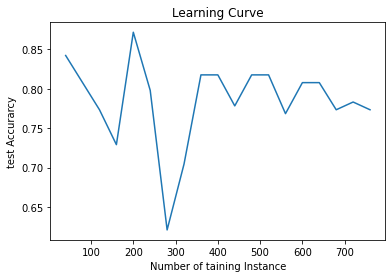

In [33]:
# Plot the learning curve using the accuracy values
    # X-axis will be the number of training instances used for creating the tree
    # Y-axis will be the accuracy in % on the Test data
    
plt.plot(x_instance, test_acc, label='test accurarcy')
plt.xlabel('Number of taining Instance')
plt.ylabel('test Accurarcy')
plt.title('Learning Curve')
plt.show()

# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

## Rubric

*   (60 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (90 points) ID3 Algorithm
*   (05 points) Extra Credit - ID3 Learning Curve



